In [1]:
import pandas as pd
import numpy as np

In [2]:
!python -m pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

     ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/44.0 MB 4.8 MB/s eta 0:00:10
     ---------------------------------------- 0.1/44.0 MB 2.6 MB/s eta 0:00:17
     --------------------------------------- 0.1/44.0 MB 901.1 kB/s eta 0:00:49
     --------------------------------------- 0.2/44.0 MB 898.2 kB/s eta 0:00:49
     --------------------------------------- 0.2/44.0 MB 898.2 kB/s eta 0:00:49
     --------------------------------------- 0.2/44.0 MB 695.5 kB/s eta 0:01:03
     --------------------------------------- 0.2/44.0 MB 695.5 kB/s eta 0:01:03
     --------------------------------------- 0.2/44.0 MB 541.9 kB/s eta 0:01:21
     --------------------------------------- 0.2/44.0 MB 573.4 kB/s eta 0:01:17
     --------------------------------------- 0.2/44.0 MB 573.4 kB/s eta 0:01:17
     --------------------------------------- 0.2/44.0 MB 486.6 kB/s eta 0:01:30
     --------------------------------------- 0.2/4

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\man'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
demand_history = pd.read_csv("Demand_History.csv")
demand_history.head()

demand_point_index  x_coordinate  y_coordinate      2010      2011  \
0                   0           0.5           0.5  0.352242  0.667932   
1                   1           1.5           0.5  0.325940  0.591964   
2                   2           2.5           0.5  0.373752  0.591890   
3                   3           3.5           0.5  0.420686  0.584055   
4                   4           4.5           0.5  0.475621  0.647940   

       2012      2013      2014      2015      2016       2017       2018  
0  0.958593  2.911901  4.338274  6.561995  8.454417  10.595324  13.119572  
1  0.862652  2.589068  4.196034  5.745551  8.753195  11.126995  12.020091  
2  0.969733  2.641432  3.541772  5.469161  8.414627  10.115336  14.018254  
3  0.906547  2.378577  3.888121  5.846089  9.083868  12.424885  15.012302  
4  0.981544  2.665400  4.218711  6.776609  8.851107  11.731131  16.355563

In [7]:
from statsmodels.tsa.stattools import adfuller

In [5]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.7 MB/s eta 0:00:06
      --------------------------------------- 0.2/9.2 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.3/9.2 MB 2.5 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/9.2 MB 3.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.2 MB 3.2 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/9.2 MB 3.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.2 MB 3.8 MB/s eta 0:00:03
     ----- ---------------------------------- 1.3/9.2 MB 3.6 MB/s eta 0:00:03
     ------ --------------------------------- 1.4/9.2 MB 3.5 MB/s eta 0:00:03
     ------- -------------------------------- 1.7/9.2 MB 3.7 MB/s eta 0:00:03
     -------- ------------------------------- 1.9/9.2 MB 3.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.1/9.2 MB 3.9 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
adfuller(demand_history.iloc[0][3:])

(1.8467828241786461,
 0.9984374262545508,
 2,
 6,
 {'1%': -5.354256481481482,
  '5%': -3.6462381481481483,
  '10%': -2.901197777777778},
 -1.160099438352498)

In [9]:
years = demand_history.columns[3:]

In [10]:
for i,year in enumerate(years[1:]):
    print(year,years[i])
#     demand_history[str(year)+'_'+str(years[i])] = demand_history[year]-demand_history[years[i]]

2011 2010
2012 2011
2013 2012
2014 2013
2015 2014
2016 2015
2017 2016
2018 2017


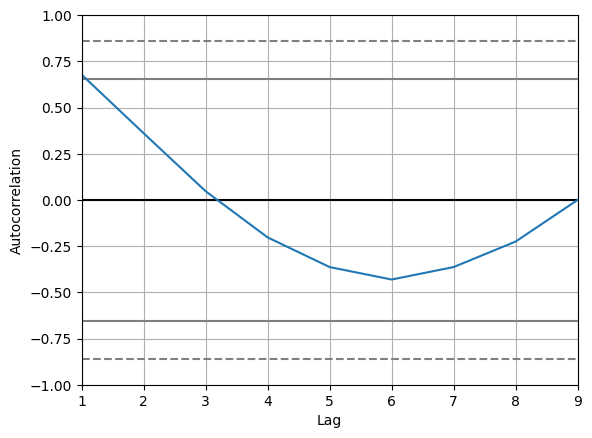

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(demand_history.iloc[0][3:])
plt.show()

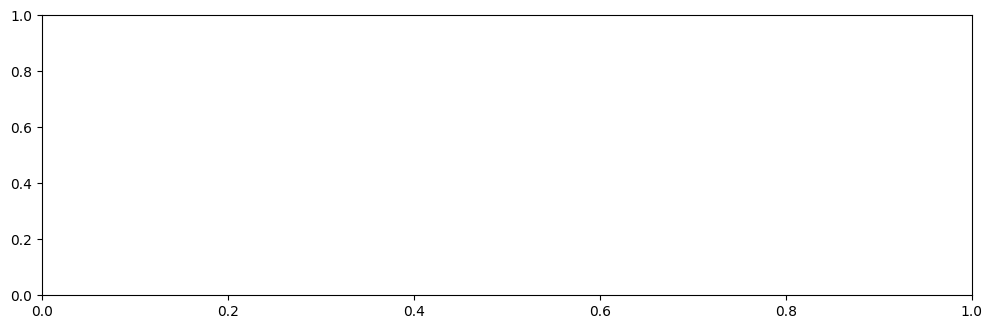

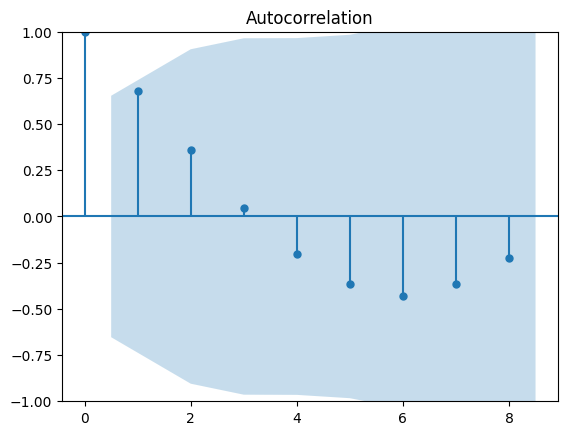

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(demand_history.iloc[0][3:])

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(demand_history.iloc[0][3:],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -9.524
Date:                Sun, 30 Jul 2023   AIC                             25.048
Time:                        10:05:03   BIC                             25.286
Sample:                    01-01-2010   HQIC                            23.440
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9501      0.439      2.165      0.030       0.090       1.810
ma.L1         -0.2316      3.211     -0.072      0.943      -6.525       6.062
sigma2         0.5002      0.234      2.136      0.033       0.041       0.959
===================================================================================
Ljung-Box (L1) (Q):                   3.48   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.06   Prob(JB):                         0.37
Heteroskedasticity (H):               0.16   Skew:                             1.21
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
model_fit.predict(start=0,end=8)

2010-01-01     0.000000
2011-01-01     0.352243
2012-01-01     0.956256
2013-01-01     1.234222
2014-01-01     4.380073
2015-01-01     5.703096
2016-01-01     8.475780
2017-01-01    10.257284
2018-01-01    12.551042
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(demand_history.iloc[0][3:],model_fit.predict(start=0,end=8))

25.216790427871228

In [16]:
demand_history[2019] = 0
demand_history[2020] = 0

In [17]:
model_fit.predict(start=9,end=10).iloc[0]

15.386114901217312

In [18]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
demand_history[2019].iloc[0],demand_history[2020].iloc[0] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

C:\Users\apr\AppData\Local\Temp\ipykernel_18872\1599194911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[0],demand_history[2020].iloc[0] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]


In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
for i in range(len(demand_history)):
    model=ARIMA(demand_history.iloc[i][3:],order=(1,1,1))
    model_fit=model.fit()
    demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

In [20]:
demand_history

demand_point_index  x_coordinate  y_coordinate      2010      2011  \
0                      0           0.5           0.5  0.352242  0.667932   
1                      1           1.5           0.5  0.325940  0.591964   
2                      2           2.5           0.5  0.373752  0.591890   
3                      3           3.5           0.5  0.420686  0.584055   
4                      4           4.5           0.5  0.475621  0.647940   
...                  ...           ...           ...       ...       ...   
4091                4091          59.5          63.5  0.171015  0.334565   
4092                4092          60.5          63.5  0.041716  0.061741   
4093                4093          61.5          63.5  0.100895  0.180352   
4094                4094          62.5          63.5  0.155353  0.290825   
4095                4095          63.5          63.5  0.209372  0.340185   

          2012      2013      2014      2015      2016       2017       2018  \
0     0.958593  2.911901  4.338274  6.561995  8.454417  10.595324  13.119572   
1     0.862652  2.589068  4.196034  5.745551  8.753195  11.126995  12.020091   
2     0.969733  2.641432  3.541772  5.469161  8.414627  10.115336  14.018254   
3     0.906547  2.378577  3.888121  5.846089  9.083868  12.424885  15.012302   
4     0.981544  2.665400  4.218711  6.776609  8.851107  11.731131  16.355563   
...        ...       ...       ...       ...       ...        ...        ...   
4091  0.556055  1.373291  1.837586  2.517146  3.352280   4.149888   5.426193   
4092  0.131291  0.386540  0.755846  0.941116  1.107797   1.309479   2.057450   
4093  0.296299  0.705373  1.300220  1.608609  1.822806   2.333681   3.218519   
4094  0.557803  1.516066  2.399426  2.719197  4.494515   6.096858   6.262574   
4095  0.749491  1.904285  2.775772  3.404641  4.574922   6.301078   6.860939   

           2019       2020  
0     15.407800  17.561933  
1     12.044651  -0.742745  
2     10.711359   1.413513  
3     12.026595   1.261348  
4     12.347090   1.677565  
...         ...        ...  
4091   4.305992   0.542731  
4092   1.506850   0.243452  
4093   2.504167   0.347107  
4094   6.240074  -0.700354  
4095   5.806346   0.532486  

[4096 rows x 14 columns]

In [21]:
demand_history.to_csv('forecasted_demand_2019.csv')

In [22]:
demand_history[demand_history[2020]<0].index

Int64Index([   1,   10,   12,   20,   21,   23,   25,   47,   48,   81,
            ...
            4066, 4071, 4074, 4076, 4080, 4081, 4084, 4085, 4090, 4094],
           dtype='int64', length=882)

In [113]:
for i in demand_history[demand_history[2020]<0].index:
    model=ARIMA(demand_history.iloc[i][3:],order=(1,1,1))
    model_fit=model.fit()
    demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\comp\com\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCop

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueW

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A d

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

C:\Users\rishikesh\AppData\Local\Temp\ipykernel_2252\4151186309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand_history[2019].iloc[i],demand_history[2020].iloc[i] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\comp\com\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index 

In [23]:
demand_history[demand_history[2019]<0]

Empty DataFrame
Columns: [demand_point_index, x_coordinate, y_coordinate, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Index: []

In [24]:
demand_history = pd.read_csv('forecasted_demand_2019.csv')

In [25]:
demand_history['2019'] = demand_history['2019']*1.2

In [26]:
years =['2019','2020']
import seaborn as sns
import matplotlib.pyplot as plt

2019


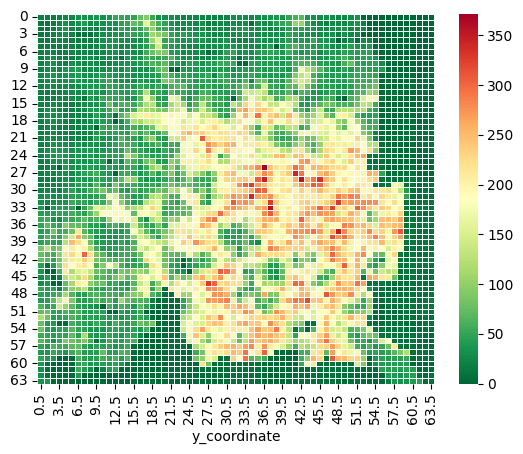

2020


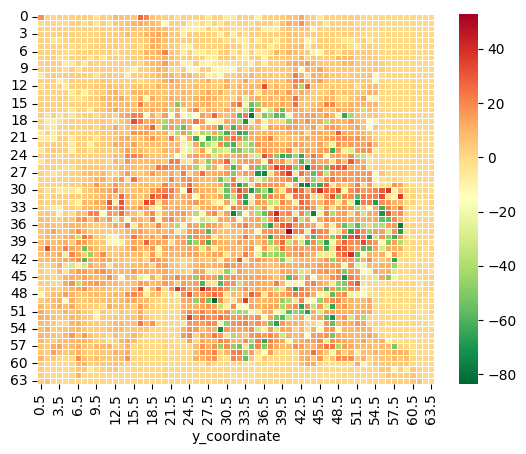

In [27]:
for year in years:
    print(year)
    temp  = demand_history[['x_coordinate','y_coordinate',year]].pivot(index='x_coordinate', columns='y_coordinate', values=year).reset_index()
    del temp['x_coordinate']
    sns.heatmap(temp, cmap='RdYlGn_r', linewidths=0.5)
    plt.show()

In [24]:
demand_history.describe()

demand_point_index  x_coordinate  y_coordinate         2010  \
count          4096.00000   4096.000000   4096.000000  4096.000000   
mean           2047.50000     32.000000     32.000000     1.993306   
std            1182.55768     18.475209     18.475209     1.849883   
min               0.00000      0.500000      0.500000     0.000000   
25%            1023.75000     16.250000     16.250000     0.474756   
50%            2047.50000     32.000000     32.000000     1.163430   
75%            3071.25000     47.750000     47.750000     3.665382   
max            4095.00000     63.500000     63.500000     6.641083   

              2011         2012         2013         2014         2015  \
count  4096.000000  4096.000000  4096.000000  4096.000000  4096.000000   
mean      4.017967     7.552549    19.323394    31.891712    42.249471   
std       4.003144     7.658317    19.080365    31.270080    39.501338   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.898346     1.613829     4.480010     6.958344    10.634926   
50%       2.134510     3.854949    10.045907    17.872258    24.146146   
75%       6.996849    13.579687    34.418367    56.016385    77.892036   
max      14.961144    28.383260    70.789208   117.063595   148.491476   

              2016         2017         2018         2019         2020  
count  4096.000000  4096.000000  4096.000000  4096.000000  4096.000000  
mean     58.718724    75.805574    88.264071    92.755779    28.268469  
std      56.133565    76.390728    79.513884    87.903632    55.309653  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      15.245858    22.668290    25.275349    26.396034     3.120101  
50%      31.755415    37.285351    54.567937    51.837192     9.224709  
75%     108.528007   138.112588   158.637564   169.287606    17.000137  
max     219.652855   302.729826   317.422418   389.777347   305.651338

In [33]:
demand_history.mean(axis=0).pct_change()*100

demand_point_index           NaN
x_coordinate          -98.437118
y_coordinate            0.000000
2010                  -93.770920
2011                  101.573051
2012                   87.969412
2013                  155.852618
2014                   65.041983
2015                   32.477902
2016                   38.980969
2017                   29.099491
2018                   16.434805
2019                    5.088942
2020                  -69.523765
dtype: float64